# Kernel Types

Let's try different kernel types.

## Response Pattern

Show how each kernel varies with pairwise-point-distances.

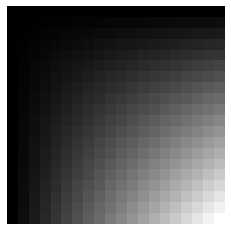

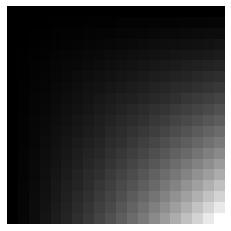

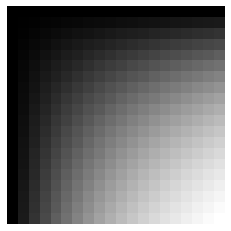

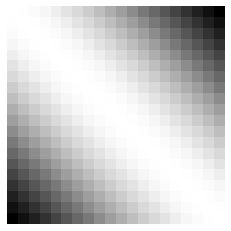

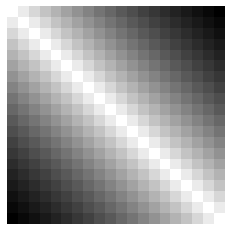

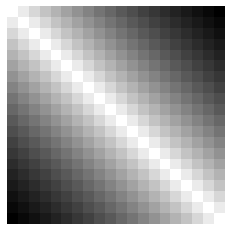

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:141: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt (math.pi / (2*x)) * np.exp(-x)
C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:138: RuntimeWarning: invalid value encountered in multiply
  return 1/(math.gamma(v) * 2**(v-1) ) * (z**v) * mod_bessel(z)


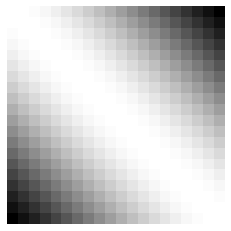

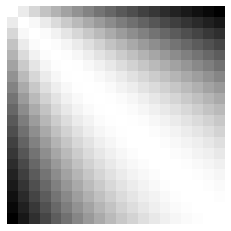

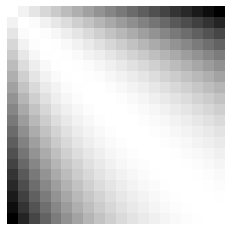

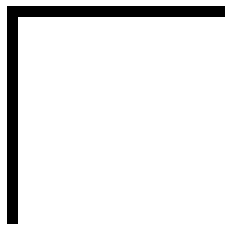

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  M[idx1,idx2] = s/d * math.sin(d/s)
C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:218: RuntimeWarning: invalid value encountered in double_scalars
  M[idx1,idx2] = s/d * math.sin(d/s)


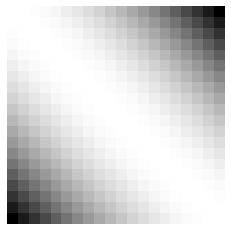

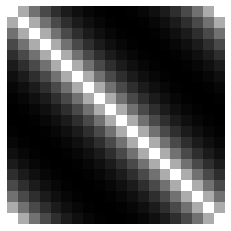

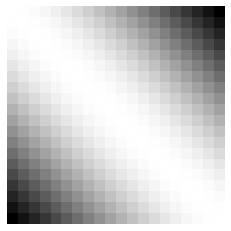

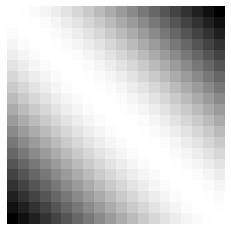

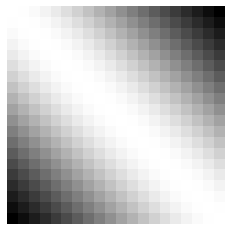

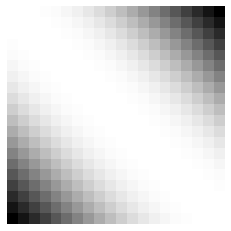

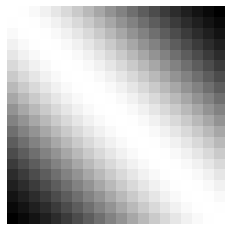

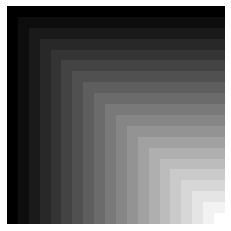

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:968: RuntimeWarning: invalid value encountered in true_divide
  return minkernel/maxkernel


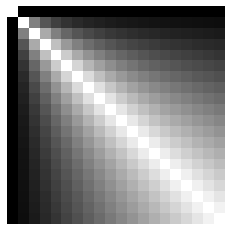

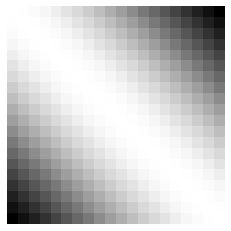

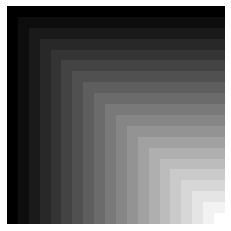

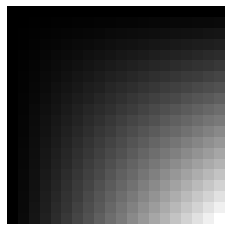

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:816: RuntimeWarning: invalid value encountered in true_divide
  return 2 * prod / (norm_1 + norm_2.T)


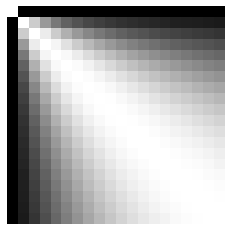

C:\Users\eleve\Documents\codex\py\machine learning\source\19. Kernel\github\src\ackl\kernels.py:73: RuntimeWarning: invalid value encountered in double_scalars
  M[idx1,idx2] = p / (np.linalg.norm(x1)**2 + np.linalg.norm(x2)**2 - p)


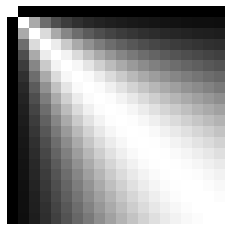

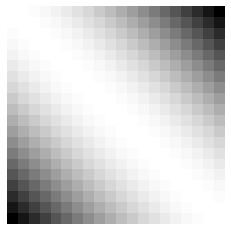

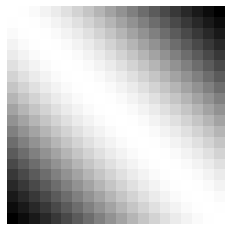

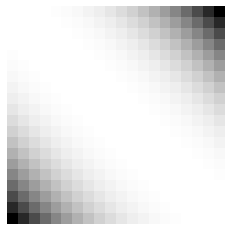

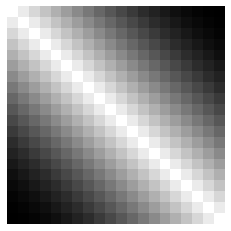

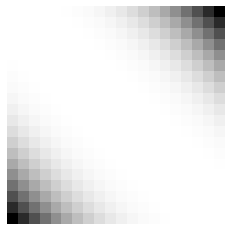

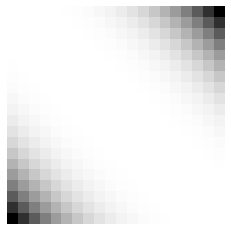

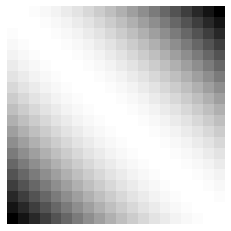

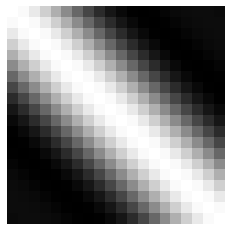

In [1]:
%run ./src/ackl/kernels.py
%run ./src/ackl/metrics.py
linear_response_pattern(20)

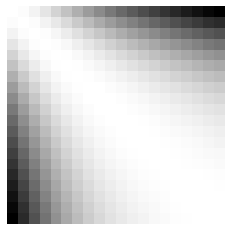

In [2]:
cosine_kernel_response_pattern(n = 20, cmap = 'gray', embed_title = False)

## Binary Response Pattern

       0      1 
    0  k(0,0) k(0,1)
    1  k(1,0) k(1,1)

# Real Dataset Experiments

load dataset from 754b_C2S_Shihu.txt
X.shape (232, 877)  y.shape (232,)


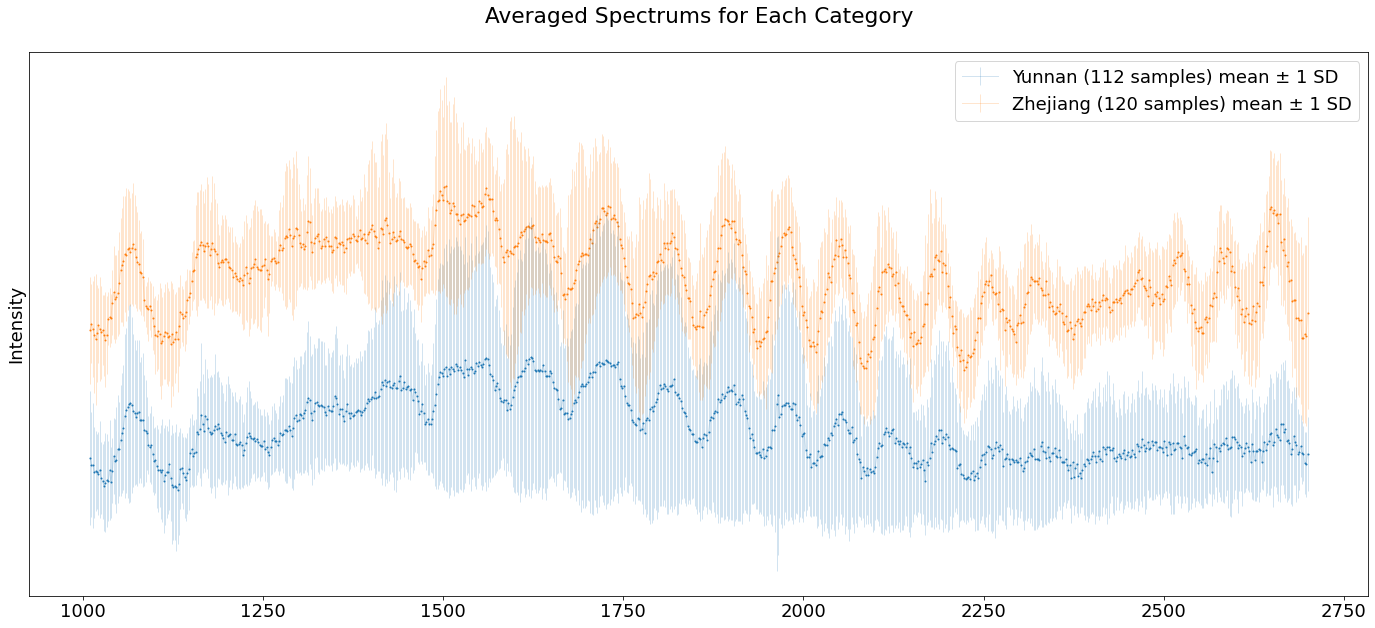

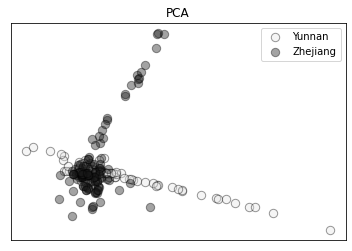

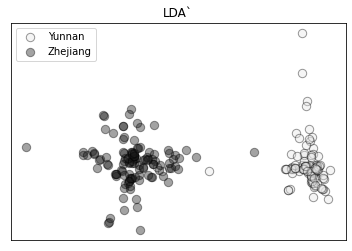

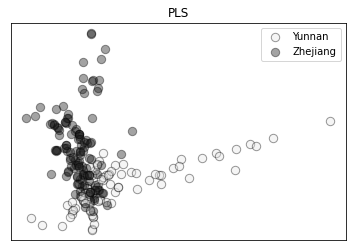

Data Set ID: 754b 铁皮石斛拉曼光谱

[云南，浙江温州]

C1 - Yunan Province (112 samples)
C2 - Wenzhou, Zhejiang Province (120 samples)

铁皮石斛拉曼光谱采集
（1）采集磐安、乐青、云南等多个产地的铁皮石斛干品样本，每个产地收集m份，样品经中药高速粉碎机成粉末样品，过200目筛后放入自封袋保存备用。
（2）实验采用美国Thermofisher公司生产的DXR2xi型显微拉曼光谱仪，拉曼光谱系统的激发波长为785nm，测量范围为50～3400 cm-1，激光功率30 mW，曝光时间0.5 s，扫描次数1000次。待测样品粉末平铺于载玻片上制成厚度均匀的片状样品后置于载物台上进行拉曼光谱采集。


In [3]:
from qsi import io
X, y, X_names, desc, labels = io.load_dataset('shihu_c2', shift = 500)

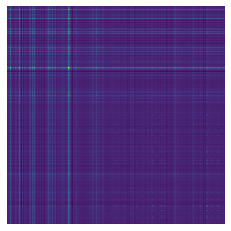

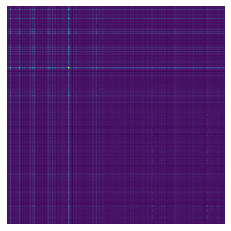

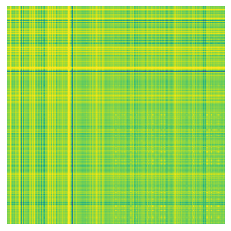

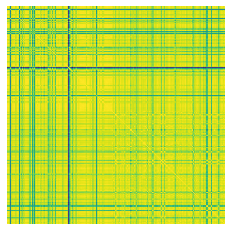

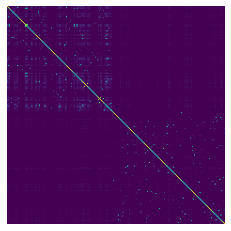

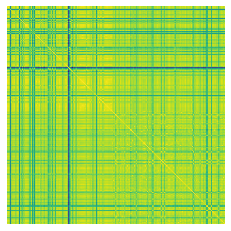

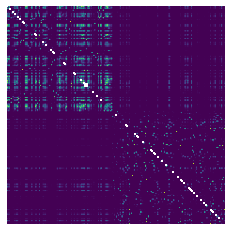

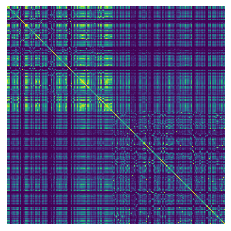

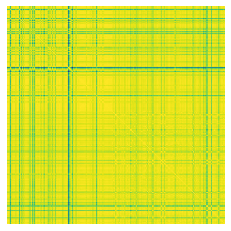

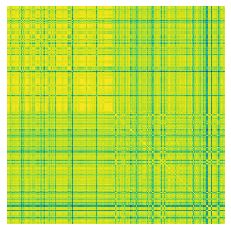

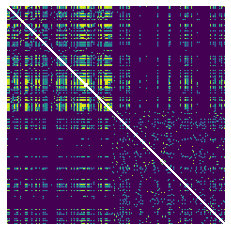

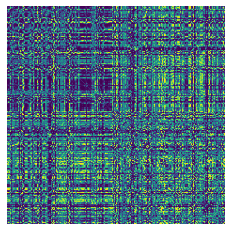

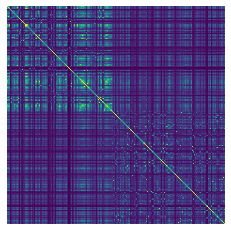

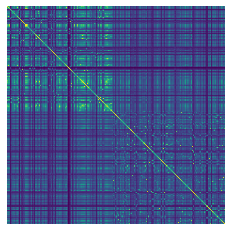

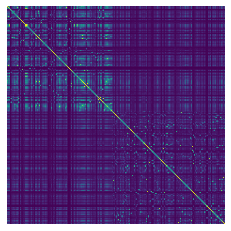

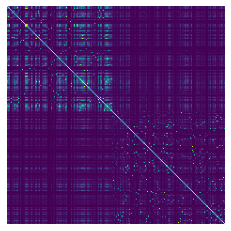

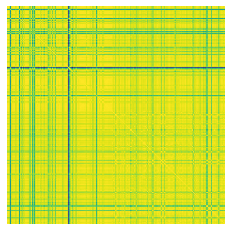

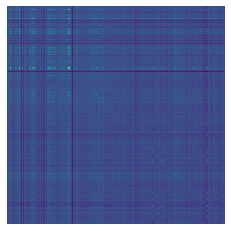

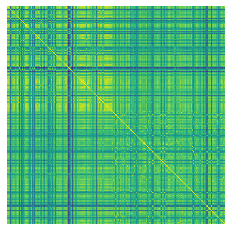

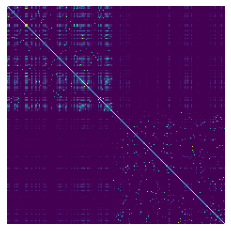

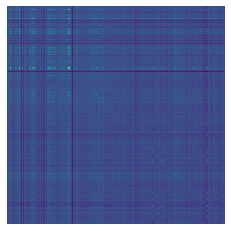

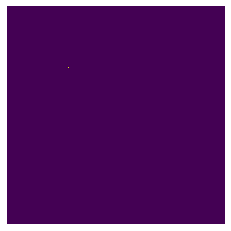

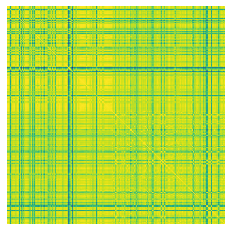

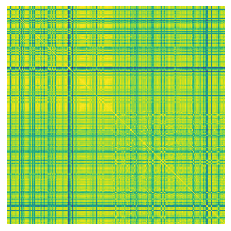

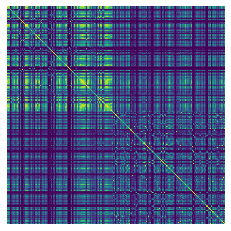

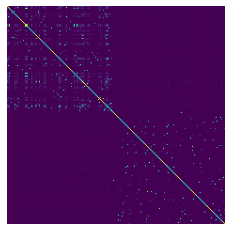

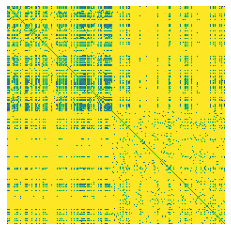

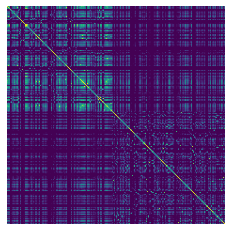

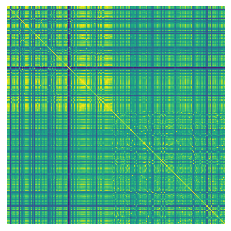

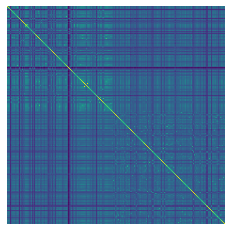

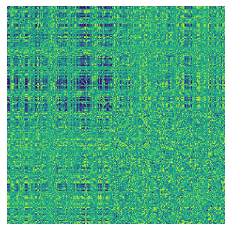

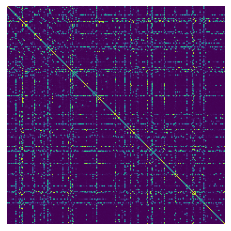

In [4]:
%run ./src/ackl/metrics.py
preview_kernels(X, y,embed_title = False)

TODO: 每个kernel，进一步超参数优化

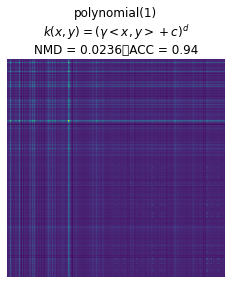

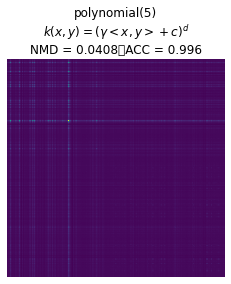

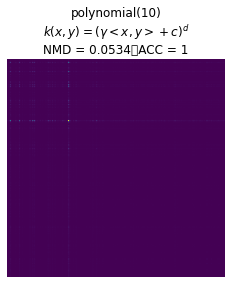

In [5]:
X_mm_scaled = MinMaxScaler().fit_transform(X)
optimize_kernel_hparam(X_mm_scaled, y, 'poly', hparams = [1, 5, 10])

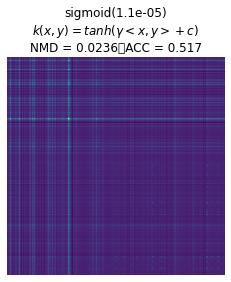

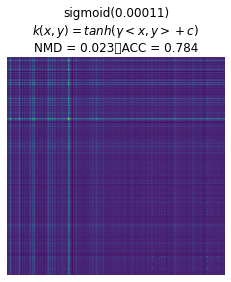

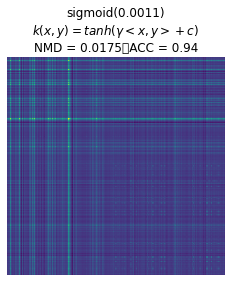

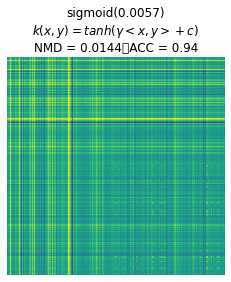

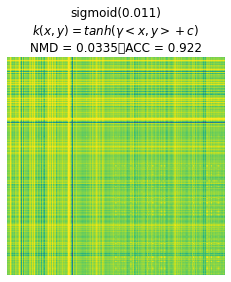

In [6]:
optimize_kernel_hparam(X_mm_scaled, y, 'sigmoid', hparams = np.array([0.01, .1, 1, 5, 10]) / X.shape[1])

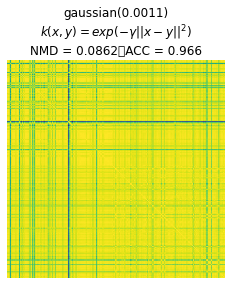

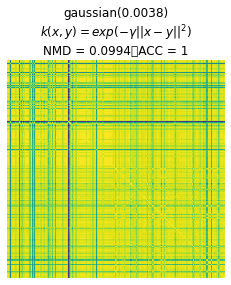

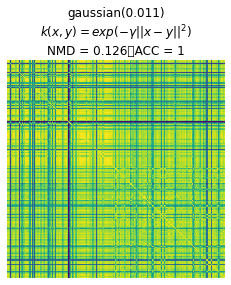

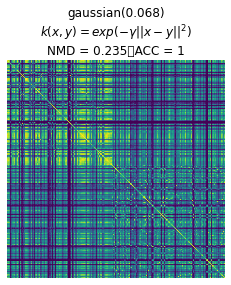

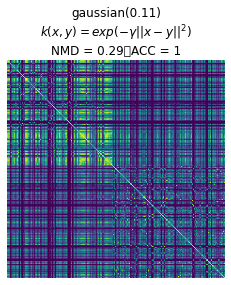

In [7]:
optimize_kernel_hparam(X_mm_scaled, y, 'gaussian', hparams = np.array([1, 3.33, 10, 60, 100]) / X.shape[1])

<hr/>
<br/>

We will not implement the following kernels.

### Bayesian Kernel (需要一个目标变量Y参与运算)

The Bayesian kernel could be given as:

$ k(x,y) = \prod_{l=1}^N \kappa_l (x_l,y_l) $

where

$ \kappa_l(a,b) = \sum_{c \in \{0;1\}} P(Y=c \mid X_l=a) ~ P(Y=c \mid X_l=b) $

However, it really depends on the problem being modeled. For more information, please see the work by Alashwal, Deris and Othman, in which they used a SVM with Bayesian kernels in the prediction of protein-protein interactions.


### B-Spline Kernel

The B-Spline kernel is defined on the interval [−1, 1]. It is given by the recursive formula:

$ k(x,y) = B_{2p+1}(x-y) $

$ \mbox{where~} p \in N \mbox{~with~} B_{i+1} := B_i \otimes B_0. $

In the work by Bart Hamers it is given by: $ k(x, y) = \prod_{p=1}^d B_{2n+1}(x_p - y_p) $

Alternatively, Bn can be computed using the explicit expression (Fomel, 2000):

$ B_n(x) = \frac{1}{n!} \sum_{k=0}^{n+1} \binom{n+1}{k} (-1)^k (x + \frac{n+1}{2} - k)^n_+ $

Where x+ is defined as the truncated power function:

$ x^d_+ = \begin{cases} x^d, & \mbox{if }x > 0 \\ 0, & \mbox{otherwise} \end{cases} $
